In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cmsassets.rationalcdn.com/blog/2018/03/truthbluff.png?fit=inside|800:700", width=600, height=200)

### Introduction

The Human Resource team who hires employees in the company analyze salary data before offering. As a data scientist helping the HR, I built a regression model to predict if the new candidate is speaking the truth or bluffing.

During the salary negotiation process, a potential employee candidate tells he has 15+ years of experience (it corresponds to the level 5 in the given dataset) and earned 123,000 annual salary in his previous company. Therefore, he is asking now for at least more than 123,000. A regression model is built to predict the truth or bluff in the candidate's salary. To do this, the HR has the only data set about ten different positions and salaries in the candidate’s previous company. 

For this report, the linear regression with varying polynomial degrees as well as random forest with varying n_estimators will be tested. The report will include the coefficients, intercept, R2, an graph with data points and the regression line. There will be conclusions in the end of the report.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv("Position_Salary.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [31]:
# preprocessing to create 2 arrays
X = df.iloc[:, 1:2].values # Level feature 
y = df.iloc[:, 2].values # Salary' feature

# small dataset so not splitting into train and test
print("Level:\n", X)
print("\nSalary:\n", y)

Level:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Salary:
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Coefficient =  [80878.78787879]
Intercept =  -195333.3333333332
R_score =  0.6690412331929895


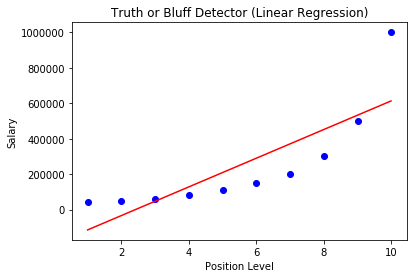

In [109]:
lm = LinearRegression()
lm.fit(X, y)
print("Coefficient = ", lm.coef_)
print("Intercept = ", lm.intercept_)
print("R_score = ", lm.score(X,y))
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, lm.predict(X_grid), color = 'red')
plt.title('Truth or Bluff Detector (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

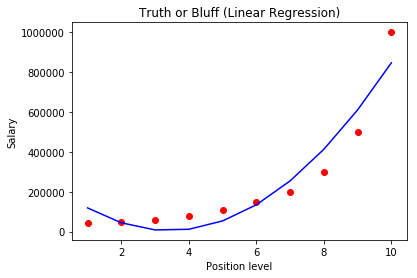

Degree =  2
Coefficient =  [      0.         -132871.21212121   19431.81818182]
Intercept =  232166.6666666665
R_score =  0.9162082221443942
Predicted Salary =  [105960.] 
 ________________________________________________________________________________


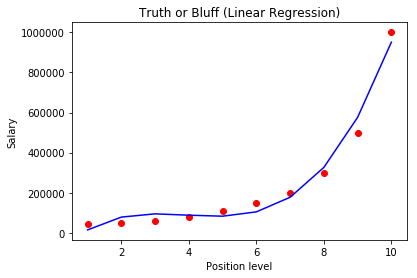

Degree =  3
Coefficient =  [     0.         180664.33566432 -48548.95104895   4120.04662005]
Intercept =  -121333.33333331218
R_score =  0.9812097727913367
Predicted Salary =  [105960.] 
 ________________________________________________________________________________


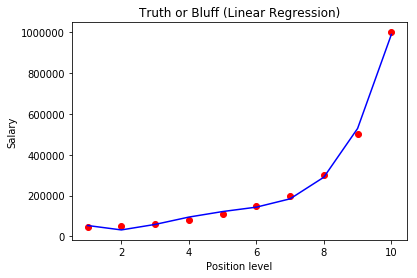

Degree =  4
Coefficient =  [      0.         -211002.33100266   94765.44289054  -15463.2867133
     890.15151515]
Intercept =  184166.6666670672
R_score =  0.9973922891706614
Predicted Salary =  [105960.] 
 ________________________________________________________________________________


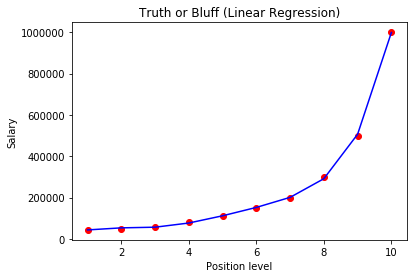

Degree =  5
Coefficient =  [ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
 -3.44638695e+03  1.57692308e+02]
Intercept =  -41333.33333268855
R_score =  0.9997969027099753
Predicted Salary =  [105960.] 
 ________________________________________________________________________________


In [119]:
# fitting polynomial regression with 2,3,4 degrees
degree = [2,3,4,5]
for i in degree:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    lm.fit(X_poly, y)
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    print("Degree = ", i)
    print("Coefficient = ", lm.coef_)
    print("Intercept = ", lm.intercept_)
    print("R_score = ", lm.score(X_poly,y))
        
    #predict salary from level of 5
    y_pred = rf.predict(np.array(5).reshape(1,-1))  #jupyter error if predict(scalar)
    print("Predicted Salary = ", y_pred, "\n", "__"*40)

### Review

The LinearRegession after being fitted by the Polynomial Regression with 2, 3, and 4 degrees all predicted a salary of less than 110,000. That indicates that the candidate is bluffing.

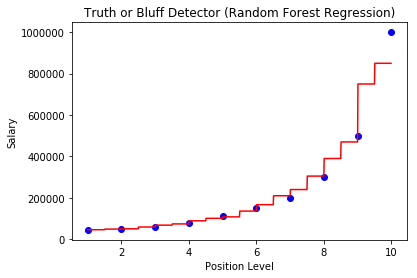

Trees =  10
Predicted Salary =  [101000.] 
 ________________________________________________________________________________


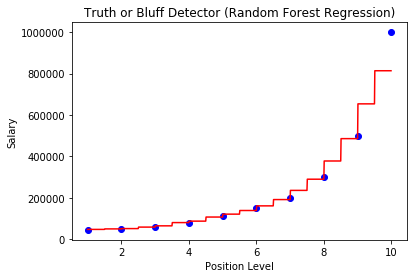

Trees =  50
Predicted Salary =  [107200.] 
 ________________________________________________________________________________


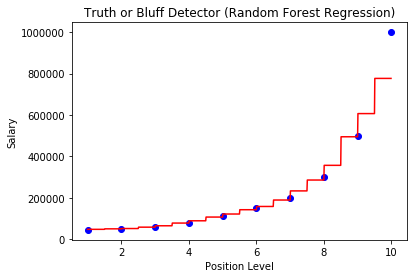

Trees =  100
Predicted Salary =  [107100.] 
 ________________________________________________________________________________


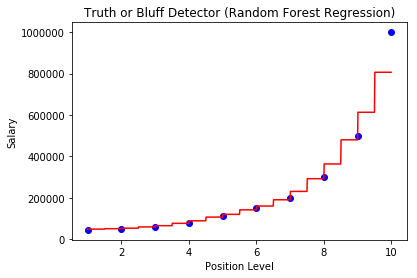

Trees =  300
Predicted Salary =  [106933.33333333] 
 ________________________________________________________________________________


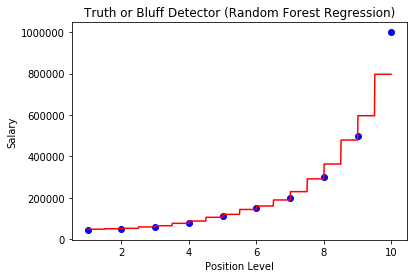

Trees =  500
Predicted Salary =  [105960.] 
 ________________________________________________________________________________


In [120]:
# also trying another regression algorithm (RandomForestRegressor) to predict
n_e = [10, 50, 100, 300, 500]
for i in n_e:
    rf = RandomForestRegressor(n_estimators=i,random_state=0).fit(X, y)
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'blue')
    plt.plot(X_grid, rf.predict(X_grid), color = 'red')
    plt.title('Truth or Bluff Detector (Random Forest Regression)')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.show()
    print("Trees = ", i)
    
    #predict salary from level of 5
    y_pred = rf.predict(np.array(5).reshape(1,-1))  #jupyter error if predict(scalar)
    print("Predicted Salary = ", y_pred, "\n", "__"*40)

### Review:

The RandomForestRegressor predictions also showed salaries of less than 110,000 so it's predicted as a bluff. It was tested with the trees of 10, 50, 100, and 500, all of which were over 15,000 under than the bluff of 123,000.

### Conclusion

This Truth or Bluff Detector can be used by the HR team as it catches if the candidate is bluffing about the salary or not. The regressions of LinearRegression and RandomForestRegressor were used to predict the salary and match with the candidate's stated salary. Both the regressions predicted a salary of less than 110,000 in many different parameter values of degrees and n_estimator. The best model was found to be LinearRegression with PolynomialFeatures(degree=5), as it gave minimal coefficients and a 99.9% R2; it predicted a salary of 105960, which is about 17000 away from the bluff of the candidate.